In [30]:
from qiskit import QuantumCircuit, transpile, Aer, assemble
from qiskit.visualization import plot_histogram

In [31]:
x0 = 0
x1 = 5
x2 = 2
x3 = 3

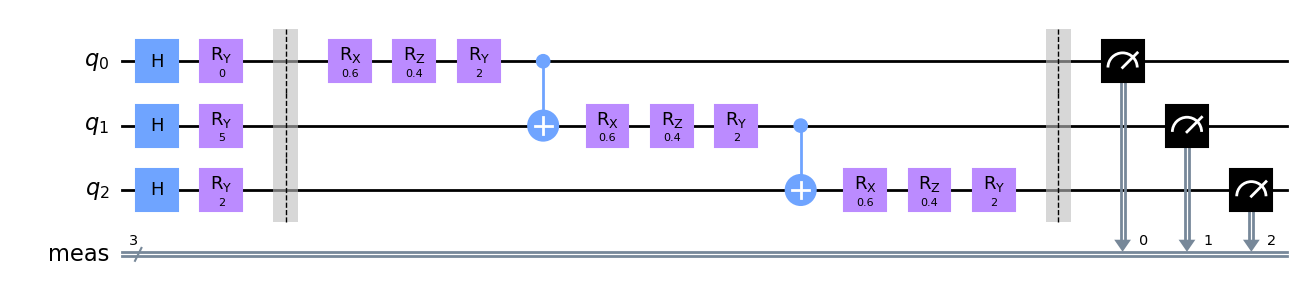

In [32]:
qc = QuantumCircuit(3)

for i, x in enumerate([x0,x1,x2]):
    qc.h(i)
    qc.ry(x,i)

qc.barrier()

for qubit in range (3):
    qc.rx(0.3 * x, qubit)
    qc.rz(0.2 * x, qubit)
    qc.ry(x, qubit)
    if qubit < 2 :
        qc.cx(qubit,qubit+1)

qc.measure_all()

qc.draw(output='mpl')                                                               


C:\Users\Administrator\AppData\Local\Temp\ipykernel_37420\2367540369.py:4: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = simulator.run(qobj).result()


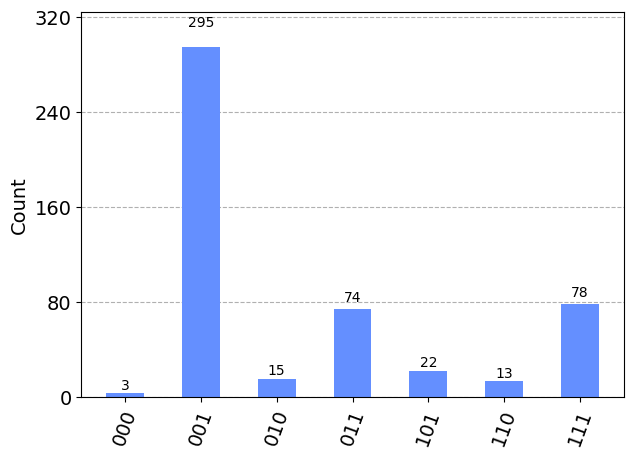

In [33]:
simulator = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(qc, simulator)
qobj = assemble(compiled_circuit, shots=500)
result = simulator.run(qobj).result()
counts = result.get_counts(qc)
plot_histogram(counts)